Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.5111 - accuracy: 0.4454 - val_loss: 0.4046 - val_accuracy: 0.4888
Epoch 2/10
 - 4s - loss: 0.3832 - accuracy: 0.4919 - val_loss: 0.3753 - val_accuracy: 0.4877
Epoch 3/10
 - 4s - loss: 0.3615 - accuracy: 0.4962 - val_loss: 0.3508 - val_accuracy: 0.4984
Epoch 4/10
 - 4s - loss: 0.3445 - accuracy: 0.4996 - val_loss: 0.3367 - val_accuracy: 0.4983
Epoch 5/10
 - 4s - loss: 0.3336 - accuracy: 0.5015 - val_loss: 0.3319 - val_accuracy: 0.5022
Epoch 6/10
 - 4s - loss: 0.3266 - accuracy: 0.5026 - val_loss: 0.3259 - val_accuracy: 0.4994
Epoch 7/10
 - 4s - loss: 0.3224 - accuracy: 0.5032 - val_loss: 0.3232 - val_accuracy: 0.5031
Epoch 8/10
 - 4s - loss: 0.3192 - accuracy: 0.5036 - val_loss: 0.3183 - val_accuracy: 0.5013
Epoch 9/10
 - 4s - loss: 0.3169 - accuracy: 0.5040 - val_loss: 0.3188 - val_accuracy: 0.5035
Epoch 10/10
 - 4s - loss: 0.3149 - accuracy: 0.5043 - val_loss: 0.3161 - val_accuracy: 0.5012


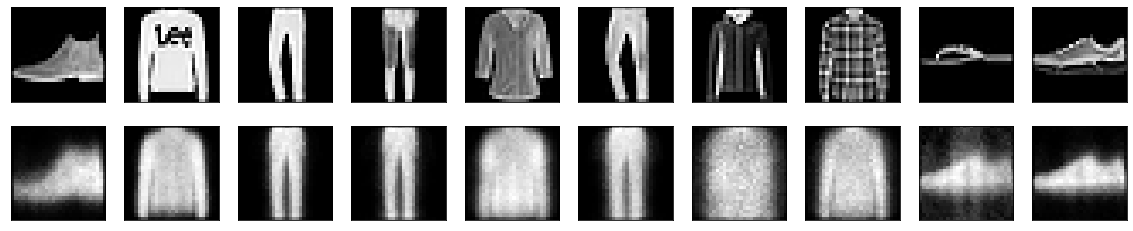

In [15]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


# use Matplotlib
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.5348 - accuracy: 0.4435 - val_loss: 0.4631 - val_accuracy: 0.0000e+00
Epoch 2/5
 - 2s - loss: 0.4308 - accuracy: 0.4881 - val_loss: 0.4101 - val_accuracy: 0.0000e+00
Epoch 3/5
 - 2s - loss: 0.4008 - accuracy: 0.4910 - val_loss: 0.3931 - val_accuracy: 0.0000e+00
Epoch 4/5
 - 2s - loss: 0.3861 - accuracy: 0.4933 - val_loss: 0.3789 - val_accuracy: 0.0000e+00
Epoch 5/5
 - 2s - loss: 0.3730 - accuracy: 0.4957 - val_loss: 0.3665 - val_accuracy: 0.0000e+00


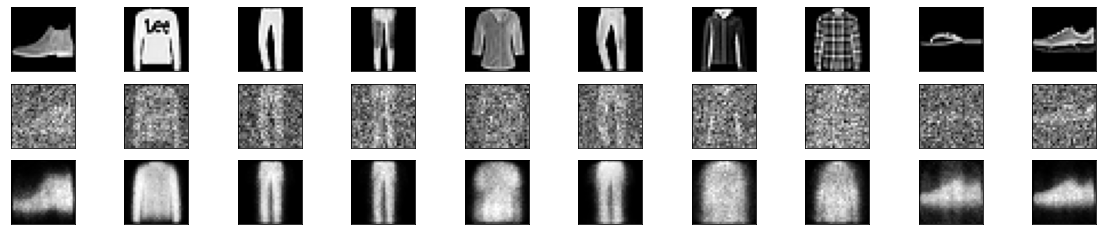

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,epochs=5,batch_size=256,shuffle=True,verbose=2,
                validation_data=(x_test, x_test_noisy))

encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 4s - loss: 0.4993 - accuracy: 0.4557 - val_loss: 0.3983 - val_accuracy: 0.4886
Epoch 2/5
 - 4s - loss: 0.3808 - accuracy: 0.4919 - val_loss: 0.3731 - val_accuracy: 0.4877
Epoch 3/5
 - 4s - loss: 0.3638 - accuracy: 0.4951 - val_loss: 0.3550 - val_accuracy: 0.4980
Epoch 4/5
 - 4s - loss: 0.3478 - accuracy: 0.4984 - val_loss: 0.3415 - val_accuracy: 0.4958
Epoch 5/5
 - 4s - loss: 0.3354 - accuracy: 0.5008 - val_loss: 0.3311 - val_accuracy: 0.5018


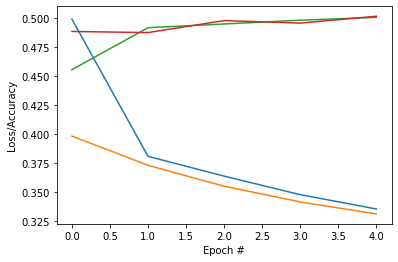

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt
encoding_dim = 32  
hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,epochs=5,batch_size=256,verbose=2,shuffle=True,validation_data=(x_test, x_test))

N=5
plt.figure()
plt.plot(np.arange(0, N), autoencode.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), autoencode.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), autoencode.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), autoencode.history["val_accuracy"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()